# Telco Customer Churn

## Introduction
Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
# import packages
import pandas as pd
import numpy as np

In [3]:
# read csv
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The summary above may say that there are no null values, but that seems fishy to me. Let's go ahead and dive deeper.

In [7]:
print(df.duplicated().sum())
print(df['customerID'].duplicated().any())

0
False


There are no duplicate rows overall or duplicate customers, which is good news.

In [8]:
# displaying unique values for each columns
for col in df.columns:
    print(col,':',df[col].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

From the above, we don't see any values that seem off at the first glance. It still seems fishy to me, particularly the floating values in TotalCharges.

In [9]:
df['TotalCharges'].dtype

dtype('O')

The data type of the column 'TotalCharges' confirms my suspicion. It is an object type instead of float, which means that there is something wrong with its values.

In [10]:
df['TotalCharges'].sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

We now see that there are empty strings for some rows in the TotalCharges columns, so let's quickly address that by stripping any spaces or indentations and replacing it with NaN's.

In [11]:
df['TotalCharges'] = df.TotalCharges.str.strip()
df = df.replace('', np.nan)
df['TotalCharges'].sort_values()

105      100.2
4459    100.25
1723    100.35
2124     100.4
2208     100.8
         ...  
3826       NaN
4380       NaN
5218       NaN
6670       NaN
6754       NaN
Name: TotalCharges, Length: 7043, dtype: object

In [12]:
# inspecting why the rows with empty TotalCharges
df[df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The rows above are the rows with no TotalCharges. Essentially, TotalCharges is MonthlyCharges multiplied by the tenure. We can see that these customers had no tenure, which is why there was no value for their TotalCharges.

In [13]:
# calculating the number of empty rows
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Out of the 7043 entries that we have in this dataset, 11 rows are insignificant in size, which means that we can simply drop them and it would have no effect on our dataset.

In [14]:
# confirming the dropped rows
df = df.dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now that there are no missing or faulty data, we can convert the data type of TotalCharges to float, as it should have been from the start.

In [15]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.TotalCharges.dtype

dtype('float64')

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## EDA

Below are columns with categorical values, which we will be exploring.

gender : ['Female' 'Male']\
SeniorCitizen : [0 1]\
Partner : ['Yes' 'No']\
Dependents : ['No' 'Yes']\
PhoneService : ['No' 'Yes']\
MultipleLines : ['No phone service' 'No' 'Yes']\
InternetService : ['DSL' 'Fiber optic' 'No']\
OnlineSecurity : ['No' 'Yes' 'No internet service']\
OnlineBackup : ['Yes' 'No' 'No internet service']\
DeviceProtection : ['No' 'Yes' 'No internet service']\
TechSupport : ['No' 'Yes' 'No internet service']\
StreamingTV : ['No' 'Yes' 'No internet service']\
StreamingMovies : ['No' 'Yes' 'No internet service']\
Contract : ['Month-to-month' 'One year' 'Two year']\
PaperlessBilling : ['Yes' 'No']\
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 
In the process of this EDA, we'll be asking questions on-the-go, and these questions will be answered with data and their visualizations.

In [17]:
# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# setting visualization theme
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style='darkgrid', palette='pastel')

To start off, let's see how many customers there are in each of the categorical columns.

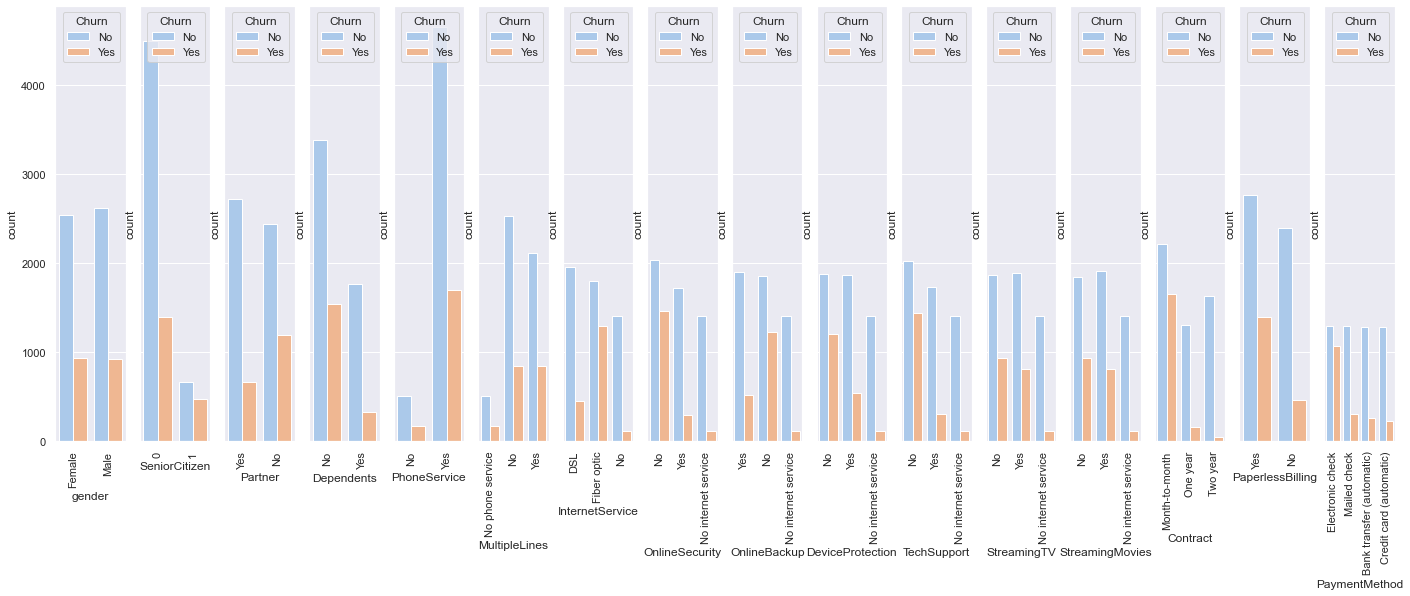

In [19]:
# visually counting all categorical columns
columns = ['gender','SeniorCitizen','Partner','Dependents',
           'PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
           'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
fig, ax = plt.subplots(1,16, figsize=(24,8), sharey=True)

for i in range(len(columns)):
    sns.countplot(data=df, x=columns[i], hue='Churn', ax=ax[i])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

In [276]:
for col in columns:
    print(df[col].value_counts())
    print('Percentage:', round(100 * df[col].value_counts()[0] / np.sum(df[col].value_counts()),2))

Male      3549
Female    3483
Name: gender, dtype: int64
Percentage: 50.47
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
Percentage: 83.76
No     3639
Yes    3393
Name: Partner, dtype: int64
Percentage: 51.75
No     4933
Yes    2099
Name: Dependents, dtype: int64
Percentage: 70.15
Yes    6352
No      680
Name: PhoneService, dtype: int64
Percentage: 90.33
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Percentage: 48.14
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
Percentage: 44.03
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
Percentage: 49.73
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
Percentage: 43.9
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
Pe

From the chart and data above, we obtain a summary as such:
- There are almost equal number of Female customers as there are Male customers. (male = 3549, female = 3483)
- There is a 6:1 ratio of non-Senior citizens as opposed to Senior citizens. (non-senior = 5890, senior = 1142, 83.76%)
- There are almost equal number of customers who have a partner as there are customers who don't. (partner = 3639, no partner = 3393)
- There is a 5:2 ratio of customers who are still dependent compared to those who are independent. (dependent = 4933, independent = 2099)
- Almost all of the customers are using phone service -- a little bit bigger than a 6:1 ratio. (phone service = 6352, no phone service = 680)
- For customers with a phone service, there is a little bit more customers who don't use multiple lines compared to those that do. (multiple lines = 3385, no multiple lines = 2967)
- The fiber optic is the most popular internet service (3096), with DSL coming in second (2416), and no internet service coming in last (1520). 
- For customers with internet service, there are more customers without online security than there are with. (3497 vs 2015)
- For customers with internet service, there are more customers without online backup than there are with. (3087 vs 2425)
- For customers with internet service, there are more customers without device protection than there are with. (3094 vs 2418)
- For customers with internet service, there are more customers without tech support than there are with. (3472 vs 2040)
- For customers with internet service, there are almost equal number of customers with TV streaming as there are without. (2703 vs 2809) 
- For customers with internet service, there are almost equal number of customers with movie streaming as there are without. (2731 vs 2781)
- Comparing their contract types, there are 3875 customers paying Month-to-Month, 1472 customers paying One-year, and 1685 customers paying Two-year.
- There is a 4:3 ratio of customers using paperless billing as opposed to using paper billing. (4168 vs 2864)
- For payment method, most of the customers are using electronic check (2365), mailed check coming in second (1604), automatic bank transfer coming in third (1542), and automatic credit card coming in last (1521).

How do the monthly charges and total charges look with each categorical values?

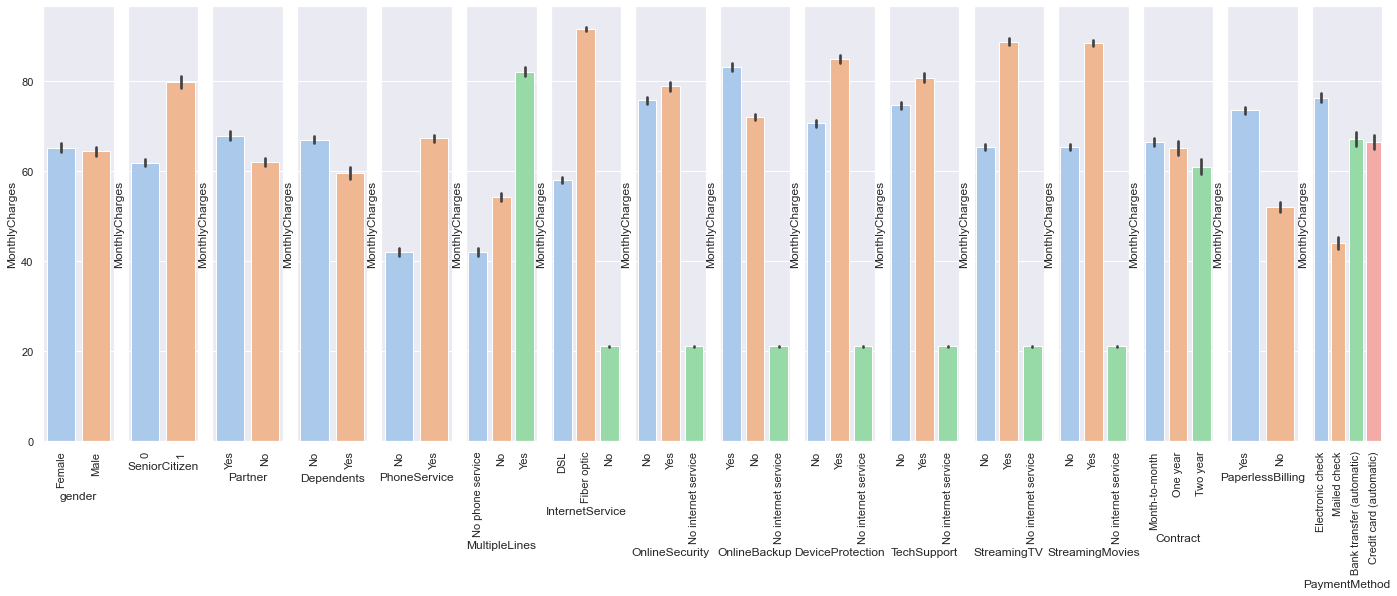

In [277]:
fig, ax = plt.subplots(1,16, figsize=(24,8), sharey=True)

for i in range(len(columns)):
    sns.barplot(data=df, x=columns[i], y='MonthlyCharges', ax=ax[i])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

Key takeaways from the monthly charges chart above:
- Male and female customers are paying the same average monthly charge.
- Senior citizens have an average monthly charge of 80, while non senior citizens are paying around 60.
- Essentially, customers who have more support and services involved in their subscription have a higher monthly charge than those who don't.
- Fiber optic is more expensive than DSL, which is why the average monthly charge for those with Fiber optic is higher.
- The monthly charge of month-to-month is higher than one-year, and two-year is the lowest. This is expected as subscriptions with a longer contract should have a lower payment fee when calculated monthly.
- Customers without paperless billing are generally paying less monthly charge, while customers with paperless billing are paying more expensive monthly charge.
- Those that are paying with mailed check are paying lower monthly charges, while those paying with electronic check are generally paying higher monthly charges.

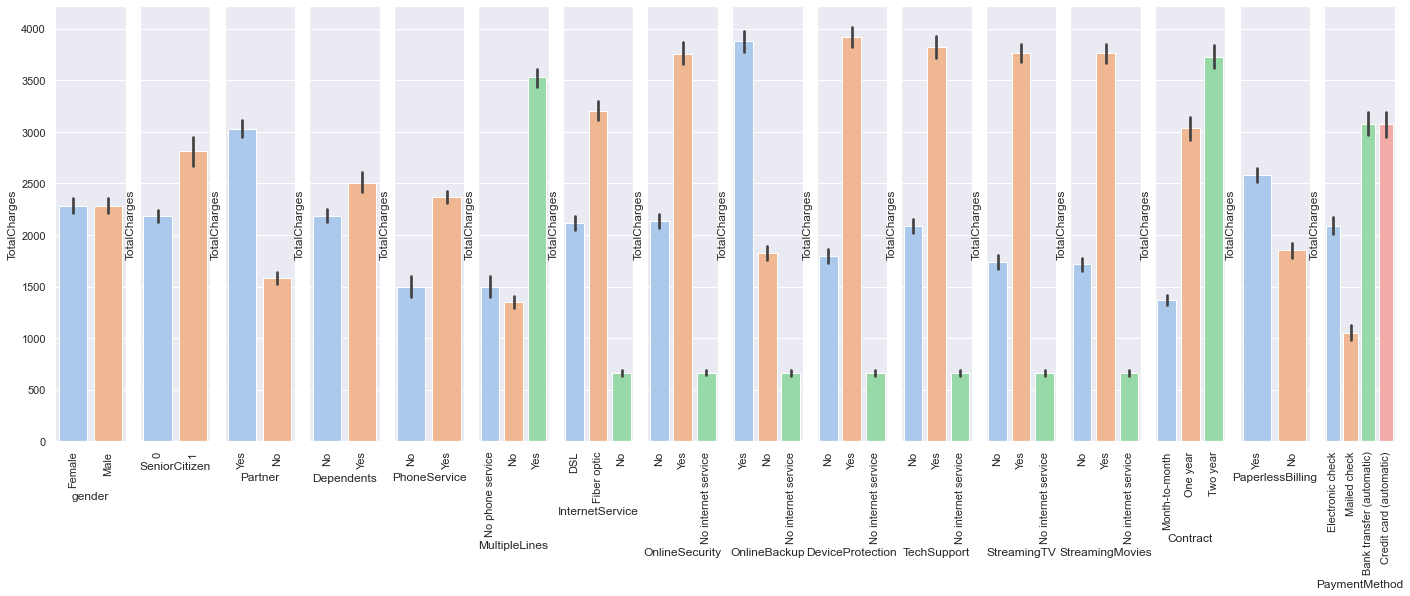

In [278]:
fig, ax = plt.subplots(1,16, figsize=(24,8), sharey=True)

for i in range(len(columns)):
    sns.barplot(data=df, x=columns[i], y='TotalCharges', ax=ax[i])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

Since the total charge is essentially the monthly charge times tenure, then conceptually, it should look similar to the monthly charge, with more gap in the observations. However, looking at the contract and the payment method columns, it seems that there the longer the contract, the higher the total charge, and that automatic bank transfer and credit card method is higher in the total charge value. It could be that they have paid in advance with automatic payments, and as such, the values are higher when totaled.

What does the distribution of the monthly charges look like?

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

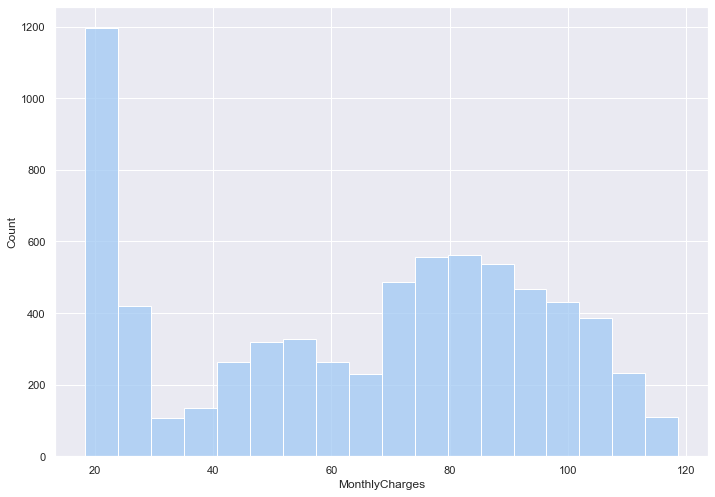

In [279]:
sns.histplot(data=df, x='MonthlyCharges')

It seems that most of the customers are paying for the cheapest service. Then there are customers in the 45-60 monthly charge range and the around the 75-90 range. We'll take a look at those customers and what their subscription looks like later on.

Meanwhile, let's take a look at the distribution of the total charges, as below.

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

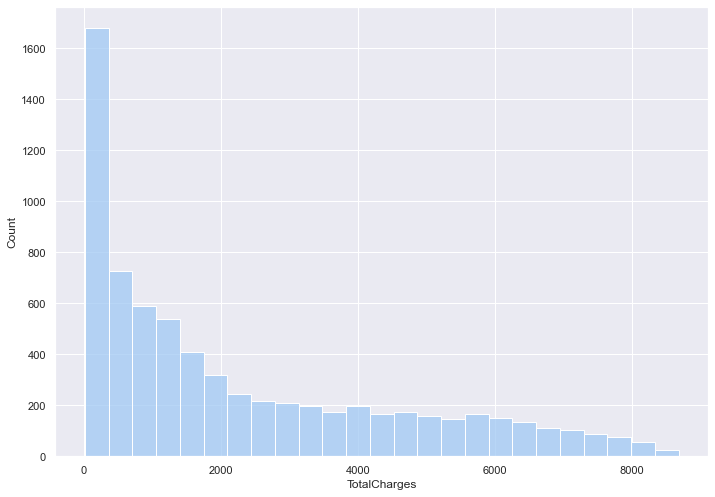

In [280]:
sns.histplot(data=df, x='TotalCharges')

This is expected, since there should more new customers than there are older customers. Newer customers mean that they'd be paying less when totaled.

We spoke of the customers distributed by their monthly charge. To start off, let's look at what the cheapest subscriptions (lowest monthly charge) look like:

In [281]:
df[df['MonthlyCharges'] < 30].sort_values('MonthlyCharges').tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6494,4310-KEDTB,Female,0,No,Yes,26,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,29.80,786.50,No
4989,0909-SDHNU,Female,0,No,Yes,7,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.80,201.95,No
3139,1142-WACZW,Male,0,No,No,2,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),29.85,75.60,Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
6777,9572-WUKSB,Male,0,Yes,No,3,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.90,92.25,No
3233,0928-JMXNP,Male,1,Yes,No,4,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.90,118.25,No
5034,9758-MFWGD,Female,1,Yes,Yes,48,No,No phone service,DSL,No,...,No,No,No,No,One year,No,Bank transfer (automatic),29.90,1388.75,No
3902,5999-LCXAO,Female,0,No,No,1,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.90,29.90,No
180,6317-YPKDH,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.95,29.95,Yes
610,6543-CPZMK,Male,0,Yes,Yes,9,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.95,248.95,Yes


We can see that they simply have the DSL internet service, no phone service, and barely any of the other services supported. They are also generally paying month-to-month.

In [282]:
df[(df['MonthlyCharges'] > 45) & (df['MonthlyCharges'] < 60)].sort_values('MonthlyCharges').tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5935,2931-FSOHN,Male,1,No,No,13,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.90,788.35,No
5507,5753-QQWPW,Female,0,No,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Electronic check,59.90,1654.70,No
3082,3401-URHDA,Male,0,No,No,51,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,No,Credit card (automatic),59.90,3043.60,No
2641,8250-ZNGGW,Female,1,No,No,5,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,No
5884,4785-QRJHC,Male,1,Yes,No,46,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),59.90,2816.65,Yes
23,3638-WEABW,Female,0,Yes,No,58,Yes,Yes,DSL,No,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No
3488,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,No
366,9069-LGEUL,Male,0,Yes,No,23,Yes,No,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406.00,No
4200,8316-BBQAY,Female,0,No,No,65,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),59.95,3921.10,No
5829,6933-VLYFX,Male,0,Yes,Yes,31,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,59.95,1848.80,No


In the middle distribution, we still see DSLs, however, the customers here will have upgraded some of the services, but not all at the same time. There are no other patterns seen.

In [283]:
df[(df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] < 90)].sort_values('MonthlyCharges').tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
61,1215-FIGMP,Male,0,No,No,60,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.90,5450.70,No
2983,4674-HGNUA,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.90,6457.15,No
3654,8751-EDEKA,Female,0,Yes,No,28,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),89.90,2433.50,No
844,3027-ZTDHO,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.90,89.90,Yes
4379,7691-XVTZH,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),89.95,5974.30,No
2997,1891-FZYSA,Male,1,Yes,No,69,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.95,6143.15,Yes
1751,9436-ZBZCT,Male,0,No,No,14,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.95,1178.40,Yes
3907,2139-FQHLM,Male,0,No,No,19,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Month-to-month,No,Mailed check,89.95,1682.40,No
2219,1302-UHBDD,Male,1,No,No,20,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,89.95,1648.45,No
2223,8182-BJDSI,Female,0,No,No,28,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.95,2625.55,Yes


In the last distribution with the higher monthly charge, we see that most of these customers have the fiber optic internet service, which causes the rise in the monthly charge. We do also see that there are customers with DSL plus all of the services supported in their subscription, which amounts to the same monthly charge as the fiber optic internet service.

Let's check for outliers in our numerical values (MonthlyCharges, TotalCharges, and tenure).

<AxesSubplot:ylabel='tenure'>

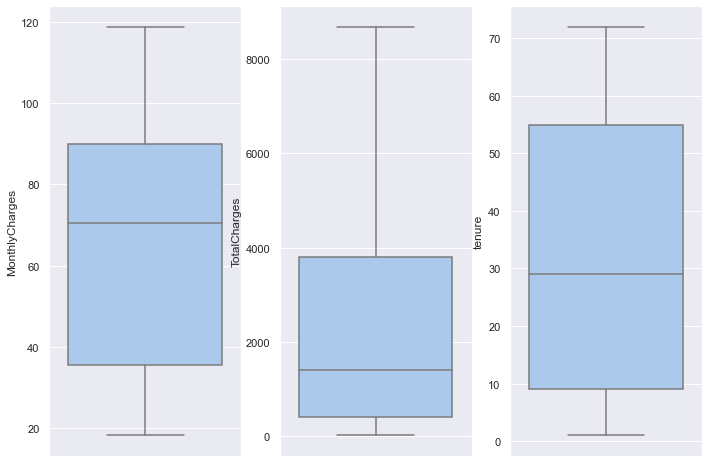

In [296]:
fig, axes = plt.subplots(1,3)
sns.boxplot(ax=axes[0], data=df, y='MonthlyCharges')
sns.boxplot(ax=axes[1], data=df, y='TotalCharges')
sns.boxplot(ax=axes[2], data=df, y='tenure')

With the different types of internet service, what type of contracts are these customers on?

<AxesSubplot:xlabel='InternetService', ylabel='count'>

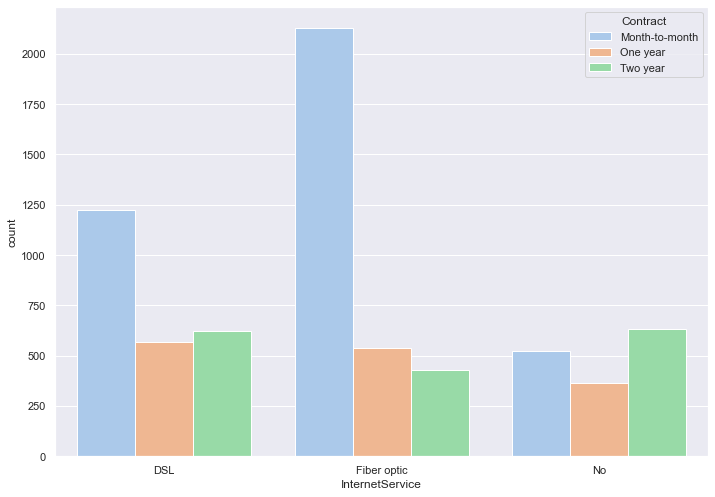

In [28]:
sns.countplot(data=df, x='InternetService', hue='Contract')

The subscriptions are generally month-to-month for any of the internet service type, and we do see that fiber optic is the most popular internet service.

Is there any correlation between gender and contract type? What about with senior citizenship with contract type?

<AxesSubplot:xlabel='Contract', ylabel='count'>

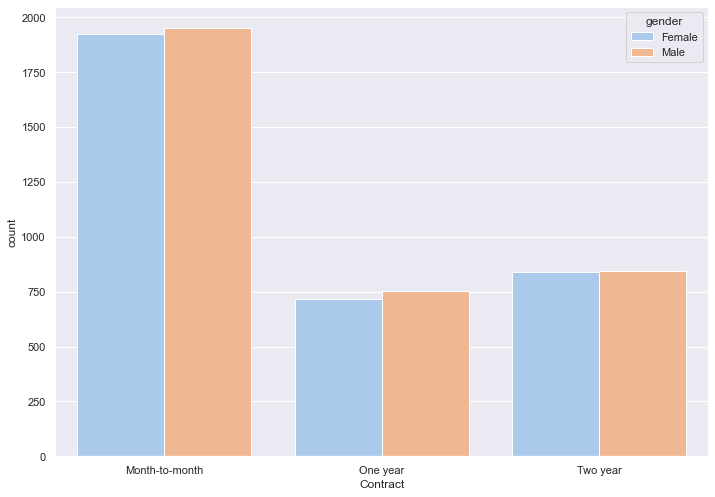

In [29]:
sns.countplot(data=df, x='Contract', hue='gender')

<AxesSubplot:xlabel='Contract', ylabel='count'>

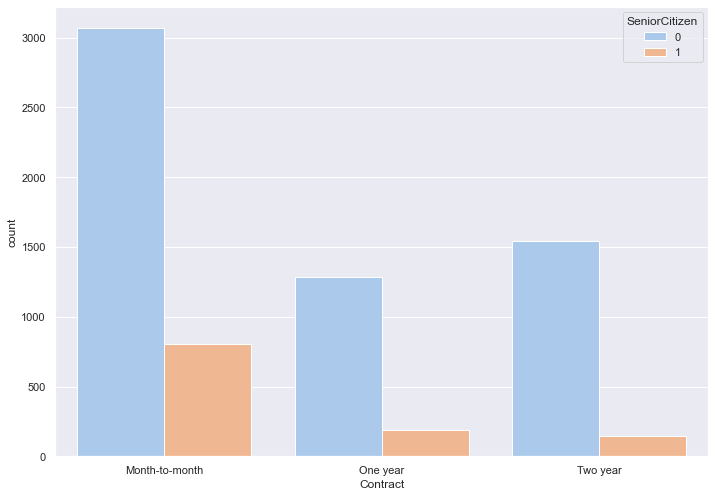

In [30]:
sns.countplot(data=df, x='Contract', hue='SeniorCitizen')

There is no difference in the contract type based on gender, however, we do see a pattern with senior citizenship. Senior citizens tend to go for the month-to-month contract type as opposed to the one year and two year contracts. Meanwhile, with non-senior citizens, month-to-month may also be the most popular contract type, but we do also see a lot of them subscribing for two year and one year contracts.

What is the correlation between tenure and monthly charges? How about tenure with total charges?

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

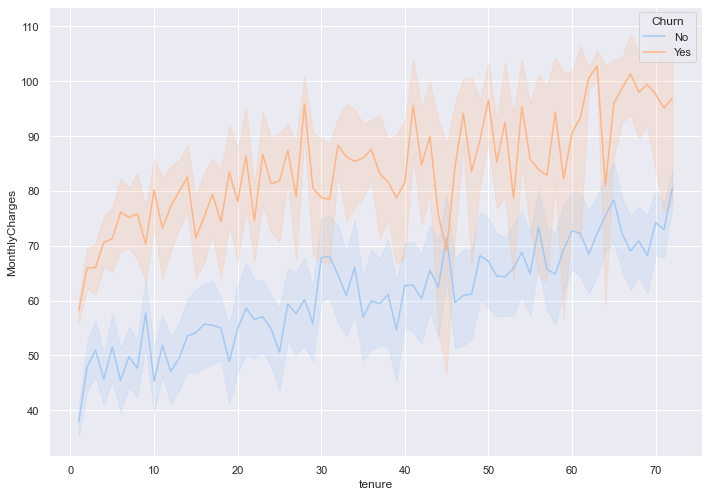

In [297]:
sns.lineplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

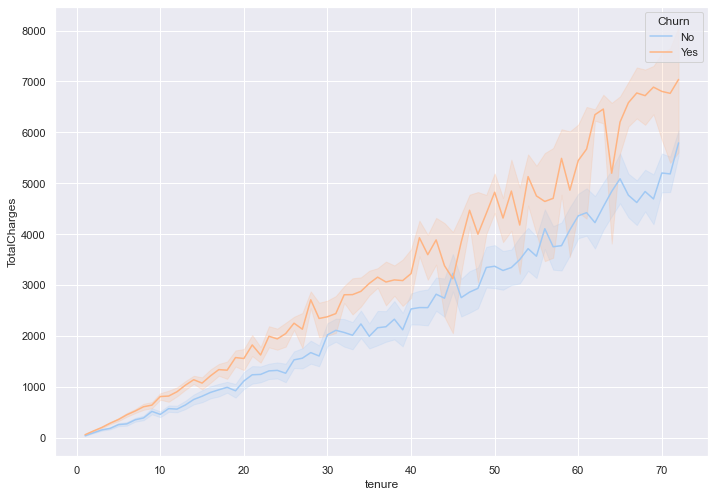

In [298]:
sns.lineplot(data=df, x='tenure', y='TotalCharges', hue='Churn')

They both have an upward trend, with monthly charge being more scaly than the total charge due to the monthly charge having more variety. This means that generally, the longer the tenure, the higher the charge, monthly or total.

Now, let's see the ratio of customers who churned versus the ones who didn't.

Percentage of churned customers: 26.58


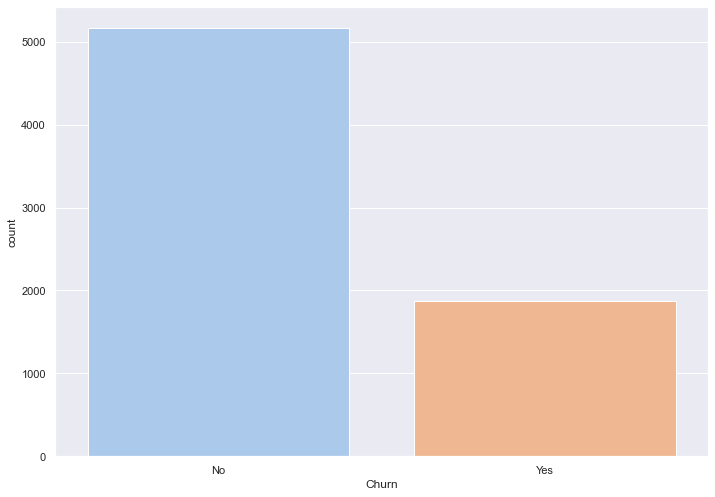

In [33]:
sns.countplot(data=df, x='Churn')
churned = df[df['Churn'] == 'Yes']
print('Percentage of churned customers:', round( 100 * len(churned) / len(df['Churn']), 2))

26.58% customers churned, which is close to 2000 customers out of the 7000+ customer entries that we have in this dataset.



Do the features in the dataset have any correlations with one another?

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
onehotencoder = OneHotEncoder()

for col in df.columns:
    if (df[col].dtype == 'object') | (df[col].dtype == 'bool'):
        df[col] = onehotencoder.fit_transform(df[col].values.reshape(-1,1)).toarray()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0,0.0,1.0,1,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,29.85,29.85,1.0
1,0.0,0.0,0,1.0,1.0,34,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,56.95,1889.50,1.0
2,0.0,0.0,0,1.0,1.0,2,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,53.85,108.15,0.0
3,0.0,0.0,0,1.0,1.0,45,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,42.30,1840.75,1.0
4,0.0,1.0,0,1.0,1.0,2,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,70.70,151.65,0.0


<AxesSubplot:>

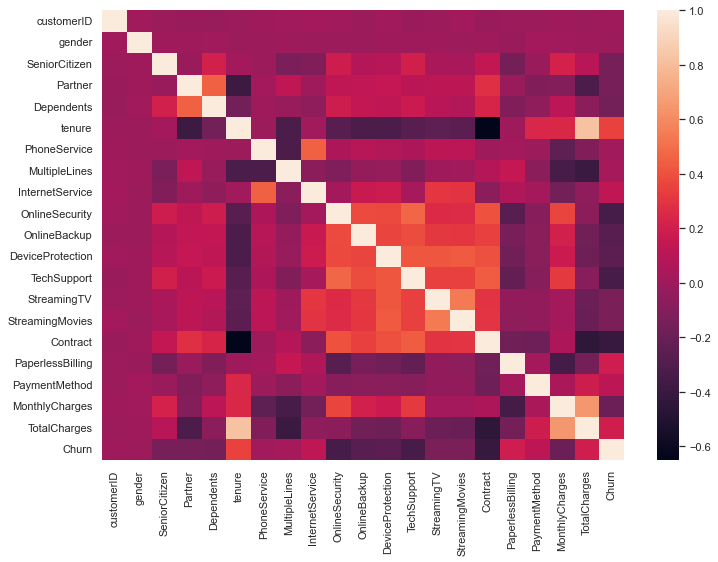

In [36]:
#print(df.corr())
sns.heatmap(df.corr())

As proven before, tenure, monthly charges, and total charges are closely correlated to each other. Other than that, we can also see correlations among some other features. Each of the different types of services supported are sort of related to each other, and a few of them are related to the monthly charges. We can also see that the one feature that is seen to be most correlated to the churn variable is tenure.

## DATA PREPROCESSING


## Label Encoder

In [37]:
# from sklearn.preprocessing import LabelEncoder

In [38]:
# le = LabelEncoder()

# for col in df.columns:
#     if (df[col].dtype == 'object') | (df[col].dtype == 'bool'):
#         df[col] = le.fit_transform(df[col])
# df.head()

Labels have already been encoded using OneHotEncoder to provide the feature correlation heatmap

## Feature Selection

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
X = df.drop('Churn', axis=1)
y = df['Churn']
print(X.shape, y.shape)

(7032, 20) (7032,)


In [41]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, y)
importance = model.coef_[0]

feature_dict = {}
for i, v in enumerate(importance):
    feature_dict[i] = v

for k in feature_dict:
    print('Feature: %0d, Score: %.5f' % (k, feature_dict[k]))

Feature: 0, Score: 0.01298
Feature: 1, Score: 0.00745
Feature: 2, Score: -0.16868
Feature: 3, Score: 0.00270
Feature: 4, Score: -0.12922
Feature: 5, Score: 0.06044
Feature: 6, Score: -0.63948
Feature: 7, Score: 0.29077
Feature: 8, Score: 0.55197
Feature: 9, Score: -0.48796
Feature: 10, Score: -0.24460
Feature: 11, Score: -0.13621
Feature: 12, Score: -0.45620
Feature: 13, Score: 0.09786
Feature: 14, Score: 0.11117
Feature: 15, Score: -0.87812
Feature: 16, Score: 0.38402
Feature: 17, Score: 0.13701
Feature: 18, Score: -0.01119
Feature: 19, Score: -0.00030


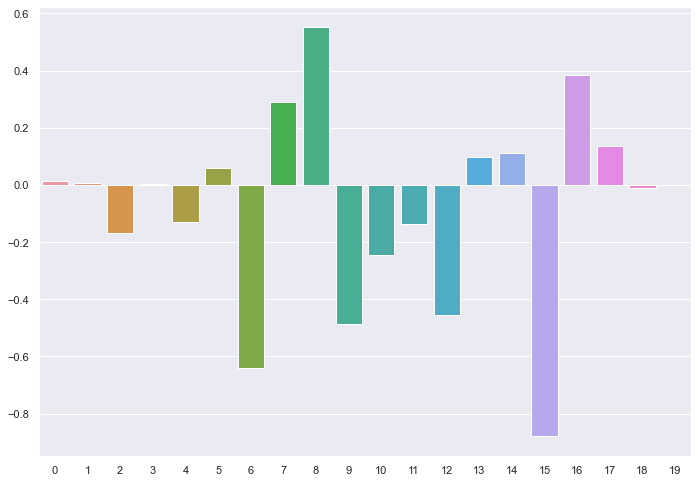

In [42]:
sns.barplot(x=[x for x in feature_dict.keys()], y=[x for x in feature_dict.values()])
plt.show()

15 Contract          \
16 PaperlessBilling  \
6 PhoneService      \
9 OnlineSecurity    \
12 TechSupport\import xgboost
2 SeniorCitizen\
4 Dependents

In [43]:
from xgboost import XGBRegressor

In [44]:
model = XGBRegressor()
model.fit(X, y)
importance = model.feature_importances_

feature_dict = {}
for i, v in enumerate(importance):
    feature_dict[i] = v

for k in feature_dict:
    print('Feature: %0d, Score: %.5f' % (k, feature_dict[k]))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01562
Feature: 2, Score: 0.01842
Feature: 3, Score: 0.01861
Feature: 4, Score: 0.01828
Feature: 5, Score: 0.03604
Feature: 6, Score: 0.02713
Feature: 7, Score: 0.03341
Feature: 8, Score: 0.12100
Feature: 9, Score: 0.08779
Feature: 10, Score: 0.03326
Feature: 11, Score: 0.02427
Feature: 12, Score: 0.08134
Feature: 13, Score: 0.02816
Feature: 14, Score: 0.03449
Feature: 15, Score: 0.30964
Feature: 16, Score: 0.02827
Feature: 17, Score: 0.01963
Feature: 18, Score: 0.03306
Feature: 19, Score: 0.03156


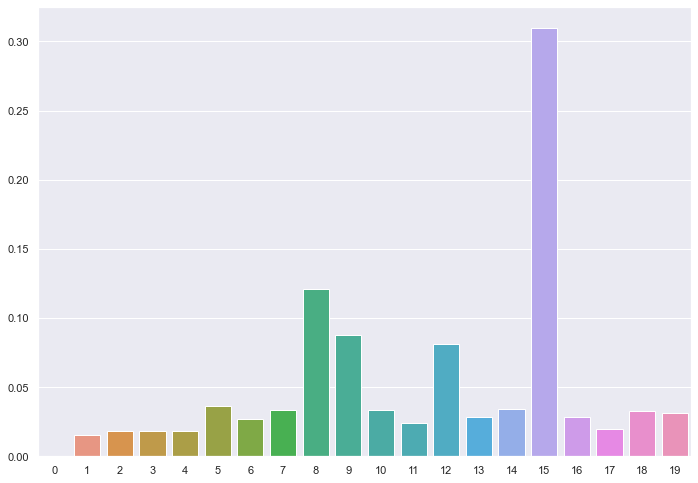

In [45]:
sns.barplot(x=[x for x in feature_dict.keys()], y=[x for x in feature_dict.values()])
plt.show()

15 Contract\
8 Internet Service\
9 Online Security\
12 Tech Support

## Training and Testing

In [184]:
X, y = df.iloc[:, :].drop('Churn', axis=1), df['Churn']
print(X.shape, y.shape)

(7032, 20) (7032,)


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error as MSE, ConfusionMatrixDisplay as CMD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

### RANDOM FOREST

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [186]:
rf = RandomForestClassifier(max_features=5, n_estimators=100)

In [187]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5)

In [188]:
rf.score(X_test, y_test)

0.8038379530916845

In [189]:
y_pred = rf.predict(X_test)

In [190]:
accuracy_score(y_pred, y_test)

0.8038379530916845

In [253]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 206  261]
 [ 112 1179]]
              precision    recall  f1-score   support

         0.0       0.65      0.44      0.52       467
         1.0       0.82      0.91      0.86      1291

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.69      1758
weighted avg       0.77      0.79      0.77      1758



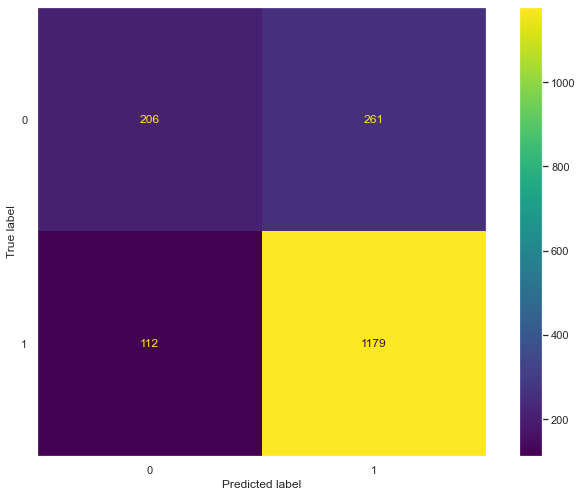

In [256]:
sns.set_style('dark')
cm = confusion_matrix(y_test, y_pred)
disp = CMD(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [192]:
rmse_test = MSE(y_test, y_pred)**0.5
print(rmse_test)

0.4429018479396034


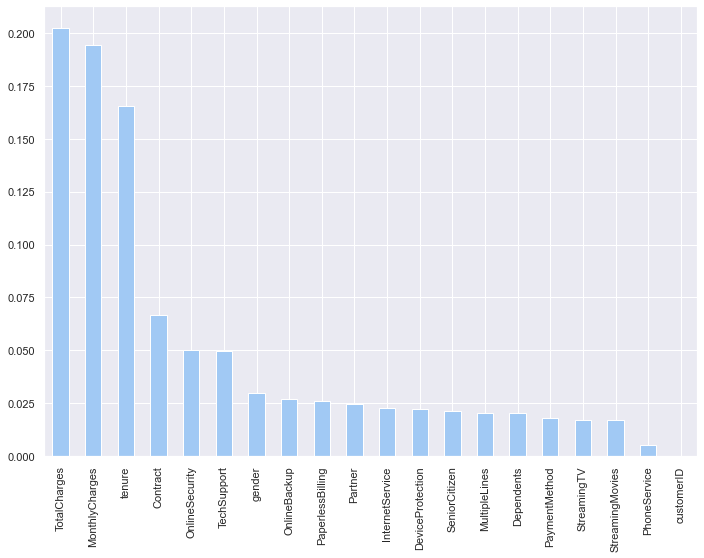

In [193]:
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances_rf.plot(kind='bar')
plt.show()

19, 18, 5, 15, 9, 12

In [194]:
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [195]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [196]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 5, 'n_estimators': 140} with a score of 0.79


In [197]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[188 186]
 [ 90 943]]
              precision    recall  f1-score   support

         0.0       0.68      0.50      0.58       374
         1.0       0.84      0.91      0.87      1033

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### PIPELINED KNN

In [227]:
X, y = df.iloc[:,[19,18,5,15]], df['Churn']
print(X.shape, y.shape)

(7032, 4) (7032,)


In [228]:
steps =[('scaler', StandardScaler()), 
        ('knn', KNeighborsClassifier())]
parameters = {'knn__n_neighbors': np.arange(1,50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

In [229]:
# scaler = StandardScaler()
# knn = KNeighborsClassifier()
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, param_grid=parameters)

In [230]:
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print('done')

done


In [231]:
print(cv.best_params_)
print(cv.best_score_)
#print(cv.cv_results_)

{'knn__n_neighbors': 40}
0.7954140849123628


True Positive | False Negative\
-----------------------------\
False Positive | True Negative

In [232]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 206  261]
 [ 112 1179]]
              precision    recall  f1-score   support

         0.0       0.65      0.44      0.52       467
         1.0       0.82      0.91      0.86      1291

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.69      1758
weighted avg       0.77      0.79      0.77      1758



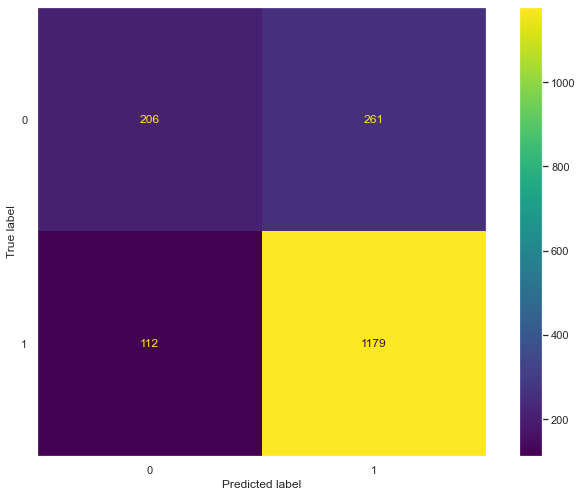

In [257]:
sns.set_style('dark')
cm = confusion_matrix(y_test, y_pred)
disp = CMD(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

### GRADIENT BOOSTING